In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import kaggle

In [14]:
#!mkdir ~/.kaggle

In [15]:
#!cp /Users/kabiraggarwal/downloads/kaggle.json /Users/kabiraggarwal/.kaggle/kaggle.json

In [16]:
#! cd /Users/kabiraggarwal/.kaggle && ls

In [18]:
!kaggle datasets download ankitbansal06/retail-orders -f orders.csv

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0
100%|█████████████████████████████████████████| 200k/200k [00:00<00:00, 218kB/s]
100%|█████████████████████████████████████████| 200k/200k [00:00<00:00, 217kB/s]


In [19]:
#extract file from zip file
import zipfile
zip_ref = zipfile.ZipFile('orders.csv.zip') 
zip_ref.extractall() # extract file to dir
zip_ref.close() # close file

In [47]:
df = pd.read_csv('Orders.csv',na_values = ['unknown','Not Available'])
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

### EDA (Exploratory Data Analysis)

In [23]:
df.describe(include = 'all')

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
count,9994.000000,9994,9993,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,730,6,3,1,531,49,NaN,4,3,17,1862,NaN,NaN,NaN,NaN
top,NaN,2023-03-09,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,OFF-PA-10001970,NaN,NaN,NaN,NaN
freq,NaN,28,5962,5191,9994,915,2001,NaN,3203,6026,1523,19,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,NaN,201.189714,229.756854,3.789574,3.484090
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,NaN,537.743203,623.245839,2.225110,1.114211
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,2.000000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,20.000000,20.000000,2.000000,2.000000
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,NaN,50.000000,50.000000,3.000000,3.000000
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,180.000000,210.000000,5.000000,4.000000


In [24]:
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


(array([0, 1, 2, 3]),
 [Text(0, 0, 'West'),
  Text(1, 0, 'East'),
  Text(2, 0, 'Central'),
  Text(3, 0, 'South')])

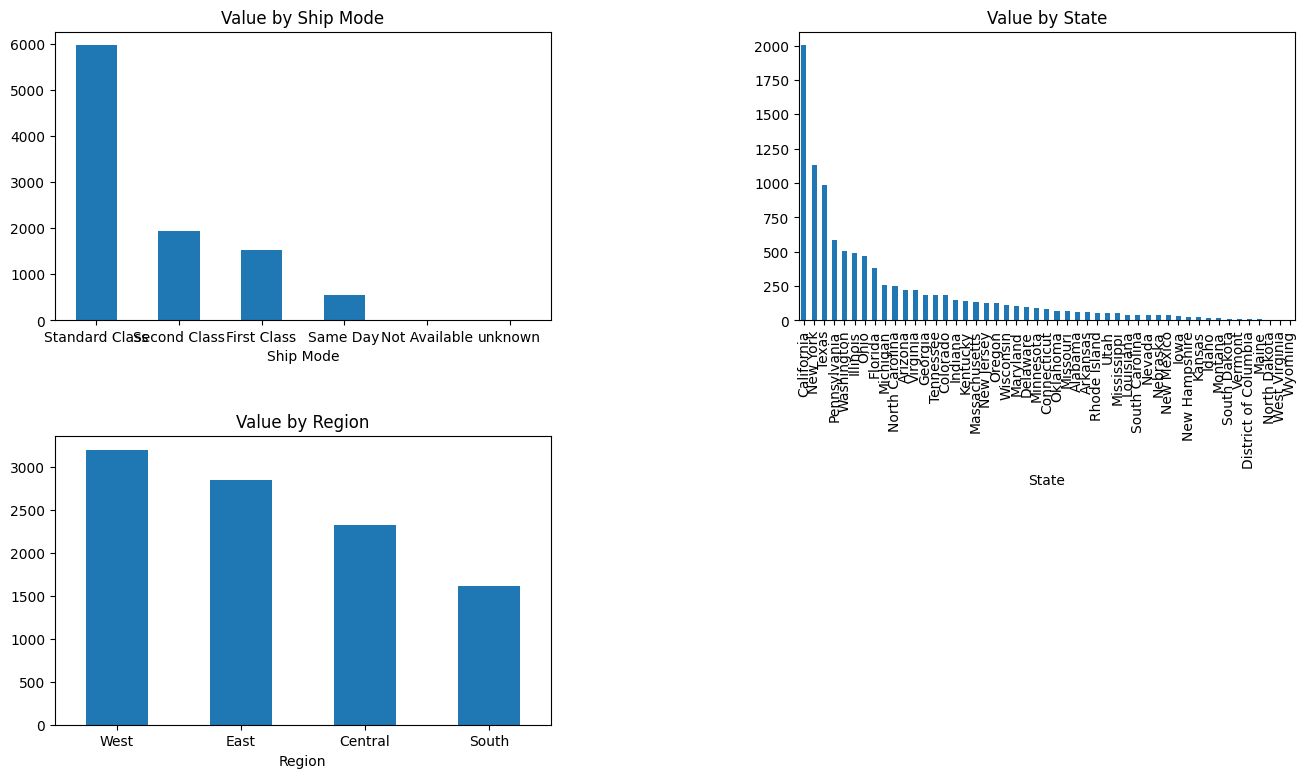

In [43]:
plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.subplot(221)
df['Ship Mode'].value_counts().plot(kind = 'bar',title = 'Value by Ship Mode', figsize = (16,9))
plt.xticks(rotation = 0)
plt.subplot(222)
df['State'].value_counts().plot(kind = 'bar',title = 'Value by State', figsize = (25,9))
plt.subplot(223)
df['Region'].value_counts().plot(kind = 'bar',title = 'Value by Region', figsize = (16,9))
plt.xticks(rotation = 0)

In [46]:
df

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3


### ETL

In [48]:
# to handle null values at source
# df = pd.read_csv('Orders.csv',na_values = ['unknown','Not Available'])

In [65]:
# rename columns to lowercase value
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [68]:
# get discount price column 
df['discount_price'] = df.list_price * df.discount_percent * 0.01
df['sale_price'] = df.list_price - df.discount_price
df['profit'] = df.sale_price - df.cost_price
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount_price,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0


In [71]:
#check datatype
df.dtypes

order_id              int64
order_date           object
ship_mode            object
segment              object
country              object
city                 object
state                object
postal_code           int64
region               object
category             object
sub_category         object
product_id           object
cost_price            int64
list_price            int64
quantity              int64
discount_percent      int64
discount_price      float64
sale_price          float64
profit              float64
dtype: object

In [74]:
#convert order_date to datetime
df['order_date'] = pd.to_datetime(df.order_date, format = '%Y-%m-%d')
df.dtypes

order_id                     int64
order_date          datetime64[ns]
ship_mode                   object
segment                     object
country                     object
city                        object
state                       object
postal_code                  int64
region                      object
category                    object
sub_category                object
product_id                  object
cost_price                   int64
list_price                   int64
quantity                     int64
discount_percent             int64
discount_price             float64
sale_price                 float64
profit                     float64
dtype: object

In [79]:
#drop columns from dataframe
df.drop(columns = ['list_price','cost_price','discount_percent'],inplace = True)


In [80]:
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount_price,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,0.9,29.1,-0.9
